In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 



In [81]:
df=pd.read_csv('loan_prediction.csv')
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Data Preprocessing 

In [82]:
df.shape

(614, 13)

Dataset has 614 rows and 13 cols

In [83]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

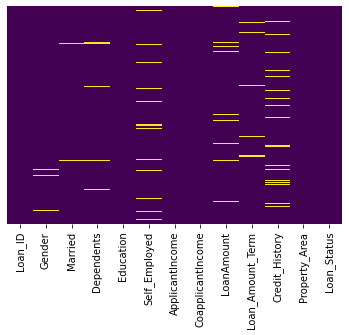

In [84]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [85]:
#filling null value of numerical columns
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [86]:
#Filling null value of categorical cbolumns
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

<AxesSubplot:>

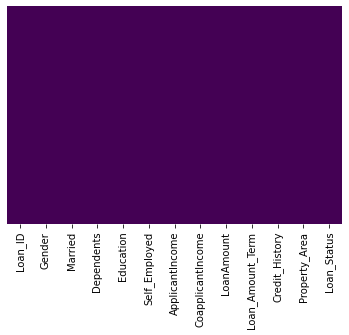

In [87]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We have replaced all the null values

# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

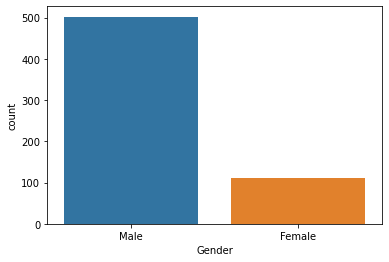

In [88]:
sns.countplot(df['Gender'])

Male ratio is much more than female ratio in all the applicants

<AxesSubplot:xlabel='Married', ylabel='count'>

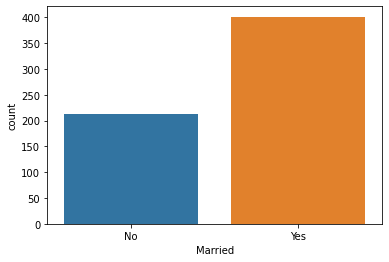

In [89]:
sns.countplot(df['Married'])

Majority of applicants are married

<AxesSubplot:xlabel='Dependents', ylabel='count'>

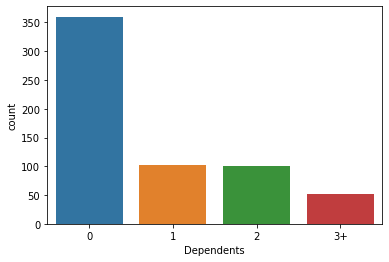

In [90]:
sns.countplot(df['Dependents'])

(i) Most of the applicants has no dependents 

(ii) Around 100 applicants has 1 dependents and same counts is applicable for
2 dependents

(iii) Atmost 50 applicants has 3+ dependents

<AxesSubplot:xlabel='Education', ylabel='count'>

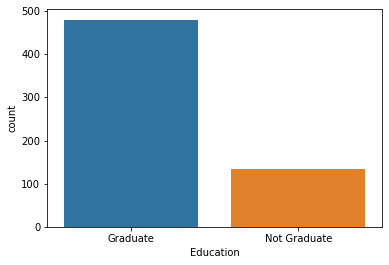

In [91]:
sns.countplot(df['Education'])

Majority of the people are graduate and 130 applicants are Not Graduate

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

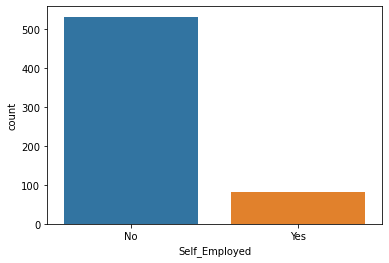

In [92]:
sns.countplot(df['Self_Employed'])

Maximum loan applicant are not Self Employed

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

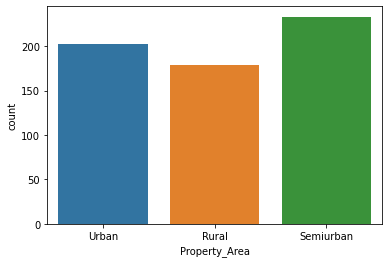

In [93]:
sns.countplot(df['Property_Area'])

Considering the property people belongs we found the applicants are almost equally distributed 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

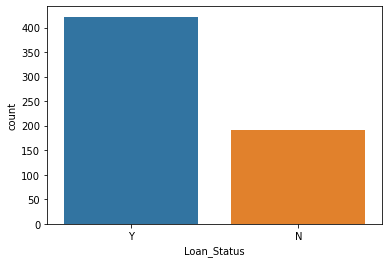

In [94]:
sns.countplot(df['Loan_Status'])

The approval status of loan is at 2:1 ratio, 2- Approved, 1- Not Approved

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

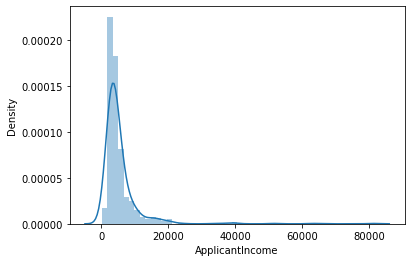

In [95]:
# numerical attributes visualization
sns.distplot(df['ApplicantIncome'])

Major of the applicant income in between 0 to 20,000/- very few are above 20000

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

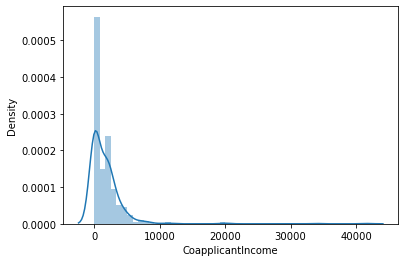

In [96]:
sns.distplot(df['CoapplicantIncome'])

Coapplicant has imcome 0-10000 in major cases

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

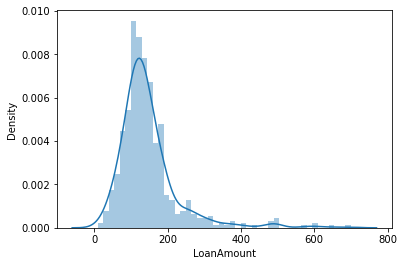

In [97]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:>

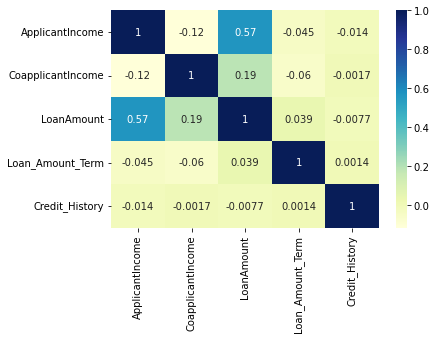

In [98]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

#Bivariate Analysis

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

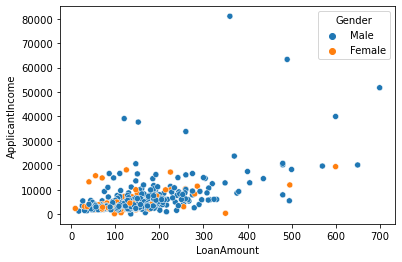

In [99]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',hue='Gender',data=df)

If applicant income is more then loan amount is also more

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

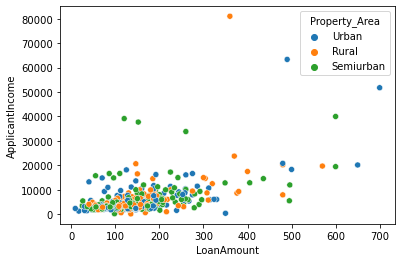

In [100]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',hue='Property_Area',data=df)

In almost all area the loan amount is equaly distributed

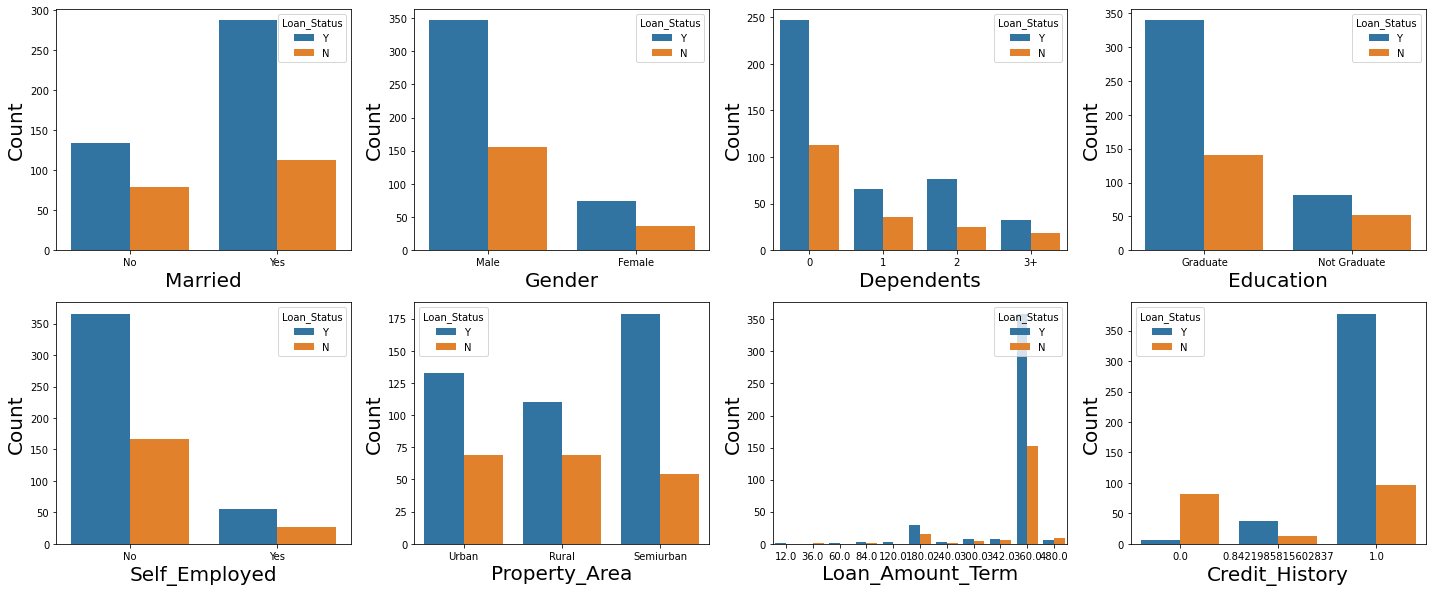

In [101]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
p=df[['Married','Gender','Dependents','Education','Self_Employed'
    ,'Property_Area','Loan_Amount_Term','Credit_History']]
q=df['Loan_Status']

for col in p:
    if plotnum<=23:
        plt.subplot(5,4,plotnum)
        sns.countplot(p[col],hue=q)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum +=1
plt.tight_layout()

The observation found from above visualisation are listed below:
    
    (i) Married Male and Female has more probability of approved loan
    
    (ii) Male applicant are higher than female applicant
    
    (iii) There are more 0 Dependents applicant
    
    (iv) Graduate applicants numbers are more than ungraduate in approved loan
    
    (v) Applicants with 1.0 Credit history has highest loan approval

# Creation of new attributes

In [102]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [103]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [104]:
def process_loan_term():
    global combined
    df['Very_Short_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    df['Short_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    df['Long_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    df['Very_Long_Term'] = df['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    df.drop('Loan_Amount_Term', axis=1, inplace=True)

In [105]:
def process_credit_history():
    global combined
    df['Credit_History_Bad'] = df['Credit_History'].map(lambda c: 1 if c==0 else 0)
    df['Credit_History_Good'] = df['Credit_History'].map(lambda c: 1 if c==1 else 0)
    df['Credit_History_Unknown'] = df['Credit_History'].map(lambda c: 1 if c==2 else 0)
    df.drop('Credit_History', axis=1, inplace=True)

In [106]:
process_credit_history()

In [107]:
process_loan_term()

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 614 non-null    object 
 3   Dependents              614 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Property_Area           614 non-null    object 
 10  Loan_Status             614 non-null    object 
 11  Total_Income            614 non-null    float64
 12  Credit_History_Bad      614 non-null    int64  
 13  Credit_History_Good     614 non-null    int64  
 14  Credit_History_Unknown  614 non-null    in

In [109]:
df['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

we can drop loanID column its unimportant 

In [110]:
df.drop('Loan_ID',inplace=True,axis=1)

In [111]:
cols=['Very_Short_Term','Short_Term','Long_Term','Very_Long_Term']
for i in cols:
    print (df[i].value_counts())

0    609
1      5
Name: Very_Short_Term, dtype: int64
0    607
1      7
Name: Short_Term, dtype: int64
0    553
1     61
Name: Long_Term, dtype: int64
1    541
0     73
Name: Very_Long_Term, dtype: int64


(i) Very Short term loan applicants are less in counts 5

(ii) Maximum are very long term applicant that is 541

# Encoding of Categorical Features

In [112]:

# ecoding of Categorical Features
categorical_col = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']

from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df[categorical_col] = df[categorical_col].apply(lbl.fit_transform)


<AxesSubplot:>

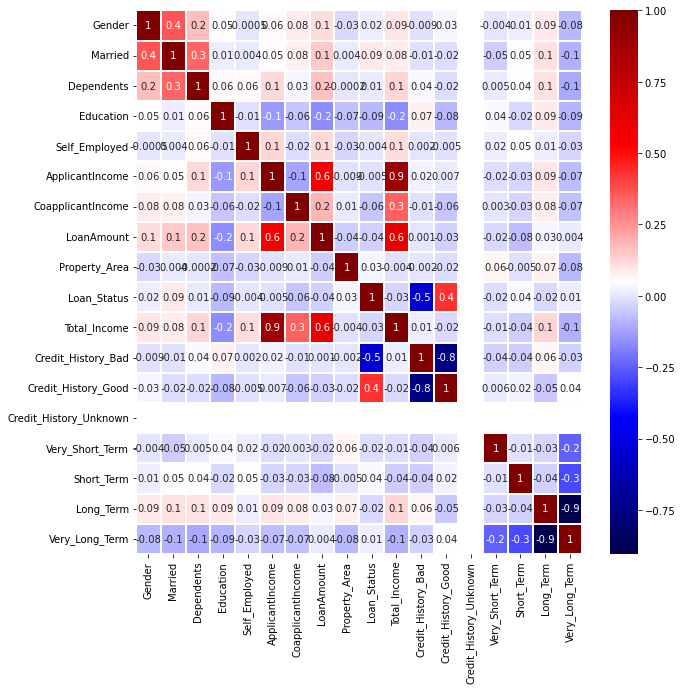

In [113]:
# Visualizing correlation between dependent and independent variables by using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',cmap="seismic",annot=True)


(i) Loan Status is positively correlated with Good Credit History 
and Negatively Correlated with Bad Credit History

# Removing of outliers

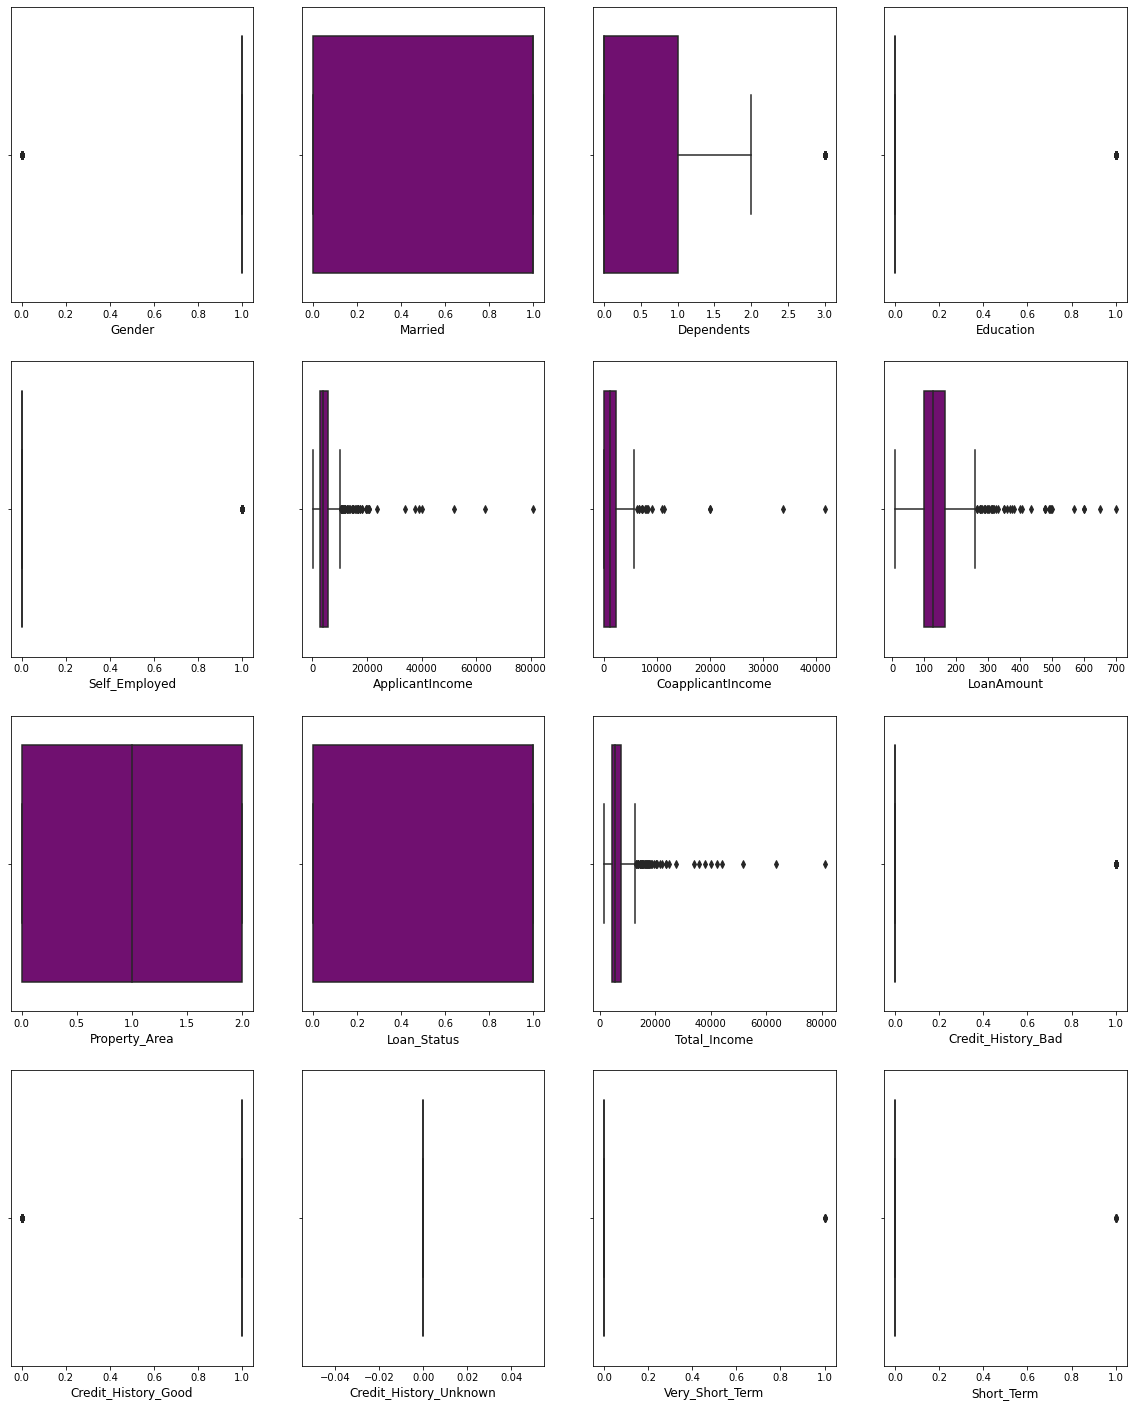

In [120]:
plt.figure(figsize=(20,25))
plotnum=1
for col in df.columns:
    if plotnum<=16:
        ax=plt.subplot(4,4,plotnum)
        sns.boxplot(df[col],color='purple')
        plt.xlabel(col,fontsize=12)
    plotnum+=1
plt.show()

There are outliers in few of the features

In [121]:
# Features having outliers and not encoded
features = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income']]


In [122]:
from scipy.stats import zscore
z=np.abs(zscore(features))

In [124]:
df.shape

(614, 18)

In [125]:
df=df[(z<3).all(axis=1)]

In [126]:
df.shape

(589, 18)

In [127]:
loss=(614-589)/614
loss

0.04071661237785016

There is 4 % Dataloss , which is acceptable

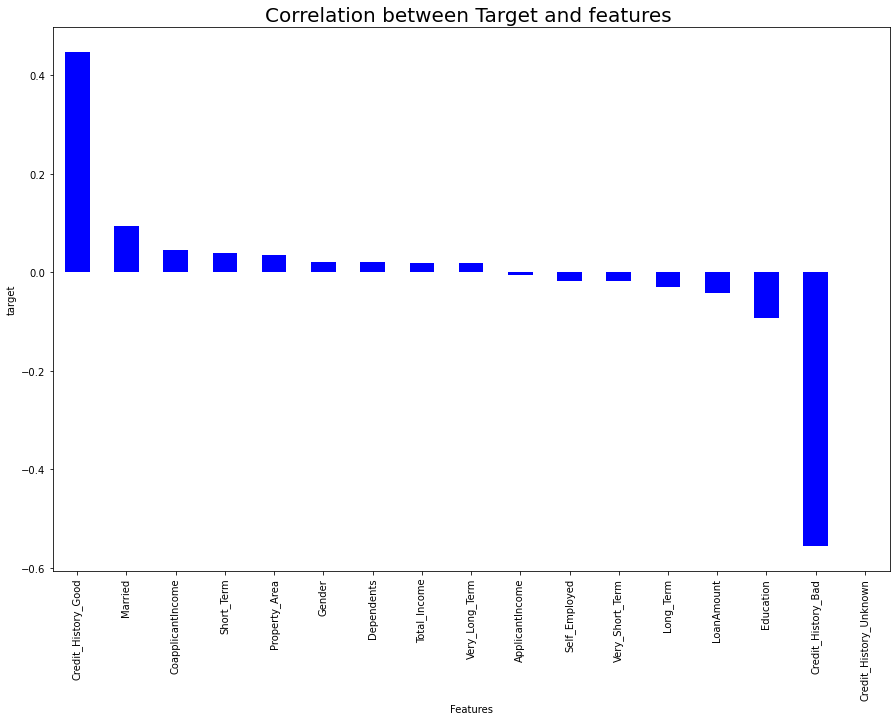

In [129]:
# generationg corraltion bar graph
plt.figure(figsize=(15,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between Target and features ',fontsize=20)
plt.show()

# Spliting of Target and Features

In [130]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

# Checking the removing the Skewness

In [131]:
x.skew()

Gender                    -1.626104
Married                   -0.631755
Dependents                 1.038787
Education                  1.303332
Self_Employed              2.218831
ApplicantIncome            2.164762
CoapplicantIncome          1.353191
LoanAmount                 1.076221
Property_Area             -0.063183
Total_Income               1.684430
Credit_History_Bad         2.010069
Credit_History_Good       -1.314930
Credit_History_Unknown     0.000000
Very_Short_Term           10.742252
Short_Term                 9.031618
Long_Term                  2.734693
Very_Long_Term            -2.387034
dtype: float64

In [132]:
# removing the skew ness
skew_cols=['Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
x[skew_cols]=scaler.fit_transform(x[skew_cols].values)
x.skew()

Gender                    -1.626104
Married                   -0.631755
Dependents                 0.465930
Education                  1.303332
Self_Employed              2.218831
ApplicantIncome            0.028063
CoapplicantIncome         -0.186195
LoanAmount                 0.060143
Property_Area             -0.063183
Total_Income               0.000000
Credit_History_Bad         2.010069
Credit_History_Good       -1.314930
Credit_History_Unknown     0.000000
Very_Short_Term           10.742252
Short_Term                 9.031618
Long_Term                  2.734693
Very_Long_Term            -2.387034
dtype: float64

few columns are lebel encoded columns ,need not to remove slewness

# Scaling of Features

In [133]:
#Scaling of Features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# MultiCollinearity

In [134]:
# checking the VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif,Features
0,1.216727,Gender
1,1.439472,Married
2,1.193616,Dependents
3,1.072893,Education
4,1.060863,Self_Employed
5,1.767612,ApplicantIncome
6,1.584105,CoapplicantIncome
7,1.596846,LoanAmount
8,1.033167,Property_Area
9,NaN,Total_Income


Priciple Component Analysis

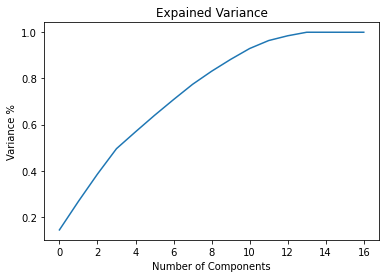

In [135]:
from sklearn.decomposition import PCA
pca=PCA()
principleComponents =pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Expained Variance')
plt.show()

14 columns are sufficient for prediction with 98% accuracy

# Slection K best Features

In [138]:
from sklearn.feature_selection import SelectKBest, f_classif

In [142]:
bestfeat=SelectKBest(score_func=f_classif,k=17)
fit=bestfeat.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
dfcolumns.head()
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(30,'Score'))

                Feature       Score
10   Credit_History_Bad  262.535101
11  Credit_History_Good  146.838277
1               Married    5.359961
3             Education    5.104883
6     CoapplicantIncome    3.807431
7            LoanAmount    0.940656
14           Short_Term    0.914131
8         Property_Area    0.715618
15            Long_Term    0.517057
0                Gender    0.282758
2            Dependents    0.219866
16       Very_Long_Term    0.216109
13      Very_Short_Term    0.194986
4         Self_Employed    0.162130
5       ApplicantIncome    0.006468


We will continue with out droping any columns as the number of columns are less

Since the target features has two unique values, not contineous so 
we will follow the classification modeling 

# Class Imbalance Check

In [169]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)
y.value_counts()

1    407
0    407
Name: Loan_Status, dtype: int64

# Best Random State for Model Building 

In [170]:
#Finding the best random state for spliting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)


Best Accuracy is 0.8872549019607843  on Random state 183


Spliting of data 

In [144]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [171]:
# function for model training and accuracy
def model_test(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=183)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(20*'--')

In [172]:
# instanciation of model
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
ad=AdaBoostClassifier(n_estimators=100)
models=[lr,dtc,rfc,gn,knn,ad]

In [173]:
# calling the funciton to find the best accuracy of model
for m in models:
    model_test(m)

LogisticRegression()
0.7205882352941176
[[62 32]
 [25 85]]
              precision    recall  f1-score   support

           0       0.71      0.66      0.69        94
           1       0.73      0.77      0.75       110

    accuracy                           0.72       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.72      0.72      0.72       204

----------------------------------------
DecisionTreeClassifier()
0.803921568627451
[[83 11]
 [29 81]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.81        94
           1       0.88      0.74      0.80       110

    accuracy                           0.80       204
   macro avg       0.81      0.81      0.80       204
weighted avg       0.82      0.80      0.80       204

----------------------------------------
RandomForestClassifier()
0.8872549019607843
[[ 81  13]
 [ 10 100]]
              precision    recall  f1-score   support

           0       0.

# Cross Validation

In [174]:
from sklearn.model_selection import cross_val_score
for m in models:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of ',m)
    print(score.mean())
    print(20*'--')

Mean Accuracy of  LogisticRegression()
0.6977656593198515
----------------------------------------
Mean Accuracy of  DecisionTreeClassifier()
0.756805271529198
----------------------------------------
Mean Accuracy of  RandomForestClassifier()
0.8354464894342195
----------------------------------------
Mean Accuracy of  GaussianNB()
0.6707339241081571
----------------------------------------
Mean Accuracy of  KNeighborsClassifier()
0.7715519200181777
----------------------------------------
Mean Accuracy of  AdaBoostClassifier(n_estimators=100)
0.7445050367340756
----------------------------------------


# RUC_AUC Score

AUC Score of  LogisticRegression()
0.7467482416417768




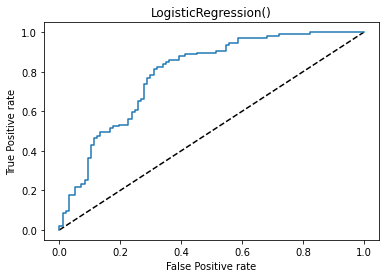

----------------------------------------
AUC Score of  DecisionTreeClassifier()
0.951344060121399




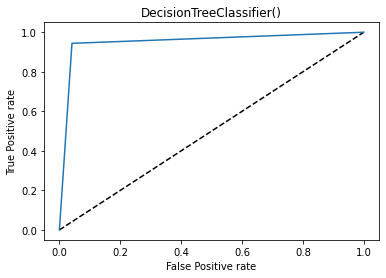

----------------------------------------
AUC Score of  RandomForestClassifier()
0.9751902880817034




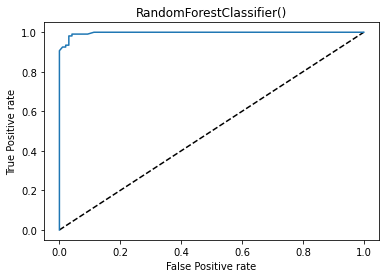

----------------------------------------
AUC Score of  GaussianNB()
0.6754022545524618




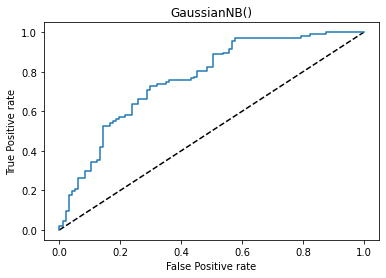

----------------------------------------
AUC Score of  KNeighborsClassifier()
0.8137585509201272




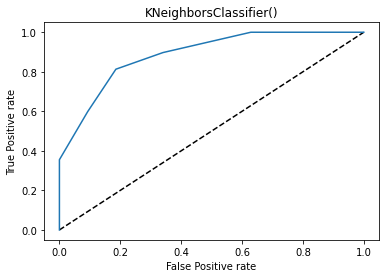

----------------------------------------
AUC Score of  AdaBoostClassifier(n_estimators=100)
0.8562963676654783




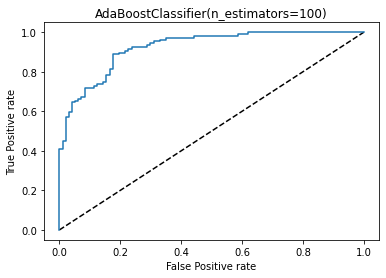

----------------------------------------


In [175]:
# checkinga 
from sklearn.metrics import roc_curve, roc_auc_score
for m in models:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thesholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of ',m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print(20*'--')

After comparing the accuracy we found the RamdomForestClassifier
with accuracy 86%, Cross Validation 79% and AUC_RUC Score 95% is 
the best model to build

# Hyper Parameter Tuning

In [176]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,200],'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_split':[2,3,4,5]}


In [177]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)

In [178]:
GSV.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200]})

In [179]:
GSV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 3,
 'n_estimators': 200}

In [180]:
final_mod=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_split=3,n_estimators=200)
final_mod.fit(x,y)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

94.11764705882352


Got the accuracy of 94 % 

# Saving the Model

In [181]:
import joblib
joblib.dump(final_mod,'Loan_Prediction,obj')


['Loan_Prediction,obj']

Saved the model for predicting the loan status 